In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import argparse as ap
from scipy.fftpack import fft
from scipy.fftpack import fftfreq
from scipy.stats import linregress as linregress
from scipy.signal import find_peaks as fpeaks
from scipy.signal import peak_widths as peak_widths
from scipy.fftpack import fftshift
from scipy import interpolate as spInt
import matplotlib.animation as manimation

plt.rc('text', usetex=True)

In [15]:
#data1 = np.genfromtxt("data/reactionRateData3/rate_0/run_0/autoCorr_2550.csv", delimiter=',')
#data2 = np.genfromtxt("data/reactionRateData3/rate_1/run_0/autoCorr_2550.csv", delimiter=',')
#data3 = np.genfromtxt("data/reactionRateData3/rate_2/run_0/autoCorr_2550.csv", delimiter=',')
#data4 = np.genfromtxt("data/reactionRateData3/rate_3/run_0/autoCorr_2550.csv", delimiter=',')
#for i in range(1, 300):
#    data1 = data1 + np.genfromtxt("data/reactionRateData3/rate_0/run_{}/autoCorr_2550.csv".format(i), delimiter=',')
#    data2 = data2 + np.genfromtxt("data/reactionRateData3/rate_1/run_{}/autoCorr_2550.csv".format(i), delimiter=',')
#    data3 = data3 + np.genfromtxt("data/reactionRateData3/rate_2/run_{}/autoCorr_2550.csv".format(i), delimiter=',');;
#    data4 = data4 + np.genfromtxt("data/reactionRateData3/rate_3/run_{}/autoCorr_2550.csv".format(i), delimiter=',')

In [16]:
#data1 = data1/300
#data2 = data2/300
#data3 = data3/300
#data4 = data4/300

In [6]:
#np.savetxt("avg_autoCorr0.csv", data1, delimiter=',')
#np.savetxt("avg_autoCorr1.csv", data2, delimiter=',')
#np.savetxt("avg_autoCorr2.csv", data3, delimiter=',')
#np.savetxt("avg_autoCorr3.csv", data4, delimiter=',')

In [2]:
def get_hwhm(data):
    freq = fftshift(fftfreq(256))
    specdat  = np.abs(fft(data[1:257]))
    specdat[0] = specdat[2]
    specdat = fftshift(specdat)
    
    adjusted_dat = specdat - (np.max(specdat) / 2)
    argMax = np.argmax(specdat)
    spline = spInt.InterpolatedUnivariateSpline(freq, adjusted_dat)
    roots = spline.roots()
    for j in range(roots.shape[-1] - 1):
        HWL = roots[-2]
        HWR = roots[-1]
        if roots[j] < freq[argMax] and roots[j + 1] > freq[argMax]:
            HWL = roots[j]
            HWR = roots[j+1]
    FW = HWR - HWL
    half_width = FW / 2
    return half_width

In [18]:
#corr_len1 = np.zeros(data2.shape[1])
#corr_len2 = np.zeros(data2.shape[1])
#corr_len3 = np.zeros(data2.shape[1])
#corr_len4 = np.zeros(data2.shape[1])

#for i in range(0, data2.shape[-1]):    
#    corr_len1[i] = 1/get_hwhm(data1[i])
#    corr_len2[i] = 1/get_hwhm(data2[i])
#    corr_len3[i] = 1/get_hwhm(data3[i])
#    corr_len4[i] = 1/get_hwhm(data4[i])    

In [19]:
#r = np.arange(data2.shape[1])

In [4]:
#data1 = np.genfromtxt("data/densityTimeSeries/rate_0/run_0/temporalData.csv", delimiter=',')
#data2 = np.genfromtxt("data/densityTimeSeries/rate_1/run_0/temporalData.csv", delimiter=',')
#data3 = np.genfromtxt("data/densityTimeSeries/rate_2/run_0/temporalData.csv", delimiter=',')
#data4 = np.genfromtxt("data/densityTimeSeries/rate_3/run_0/temporalData.csv", delimiter=',')
data1 = np.genfromtxt("data/reactionRateData3/rate_0/corr_len_2.csv", delimiter=',')
data2 = np.genfromtxt("data/reactionRateData3/rate_1/corr_len_2.csv", delimiter=',')
data3 = np.genfromtxt("data/reactionRateData3/rate_2/corr_len_2.csv", delimiter=',')
data4 = np.genfromtxt("data/reactionRateData3/rate_3/corr_len_2.csv", delimiter=',')
#for i in range(1, 50):
#    data1 = data1 + np.genfromtxt("data/densityTimeSeries/rate_0/run_{}/temporalData.csv".format(i), delimiter=',')
#    data2 = data2 + np.genfromtxt("data/densityTimeSeries/rate_1/run_{}/temporalData.csv".format(i), delimiter=',')
#    data3 = data3 + np.genfromtxt("data/densityTimeSeries/rate_2/run_{}/temporalData.csv".format(i), delimiter=',')
#    data4 = data4 + np.genfromtxt("data/densityTimeSeries/rate_3/run_{}/temporalData.csv".format(i), delimiter=',')

In [5]:
#data1 = data1/50
#data2 = data2/50
#data3 = data3/50
#data4 = data4/50
r = np.arange(data2.shape[-1])

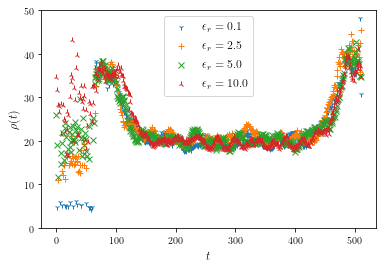

In [9]:
fig1, ax1 = plt.subplots(facecolor="white")
ax1.plot(r[:], data1[:], marker='1', linestyle='None', label=r"$\epsilon_r = 0.1$")
ax1.plot(r[:], data2[:], marker='+', linestyle='None', label=r"$\epsilon_r = 2.5$")
ax1.plot(r[:], data3[:], marker='x', linestyle='None', label=r"$\epsilon_r = 5.0$")
ax1.plot(r[:], data4[:], marker='2', linestyle='None', label=r"$\epsilon_r = 10.0$")
#ax1.plot(data1, linestyle="-", label=r"$\epsilon_m = 0.1$")
#ax1.plot(data2, linestyle="-", label=r"$\epsilon_m = 2.5$")
#ax1.plot(data3, linestyle="-", label=r"$\epsilon_m = 5.0$")
#ax1.plot(data4, linestyle="-", label=r"$\epsilon_m = 10.0$")
#ax1.semilogy(r[1:128], data1[70,1:128], label=r"$\epsilon_r = 0.1$")
#ax1.semilogy(r[1:128], data2[70,1:128], label=r"$\epsilon_r = 2.5$")
#ax1.semilogy(r[1:128], data3[70,1:128], label=r"$\epsilon_r = 5.0$")
#ax1.semilogy(r[1:128], data4[70,1:128], label=r"$\epsilon_r = 10.0$")
#ax1.axhline(30, linestyle='--', color='k')
#ax1.axvline(64, linestyle='-', color='k')
#ax1.axvline(138, linestyle='--', color='k')
#ax1.axvline(438, linestyle='--', color='k')
#ax1.axvline(511, linestyle='-', color='k')
#ax1.axhline(0.75, linestyle='--', color='k', label='Mean Field Carrying Capacity')
ax1.set_xlabel(r'$t$', fontsize='large')
ax1.set_ylabel(r'$\rho(t)$', fontsize='large')
ax1.set_ylim(bottom=0, top=50)
ax1.legend(fontsize='large')

plt.savefig("net_densities.png", dpi=200)

In [5]:
data5  = np.genfromtxt("data/reactionRateData4/rate_0/corr_len.csv", delimiter=',')
data6  = np.genfromtxt("data/reactionRateData4/rate_1/corr_len.csv", delimiter=',')
data7  = np.genfromtxt("data/reactionRateData4/rate_2/corr_len.csv", delimiter=',')
data8  = np.genfromtxt("data/reactionRateData4/rate_3/corr_len.csv", delimiter=',')
data9  = np.genfromtxt("data/reactionRateData4/rate_4/corr_len.csv", delimiter=',')
data10 = np.genfromtxt("data/reactionRateData4/rate_5/corr_len.csv", delimiter=',')
data11 = np.genfromtxt("data/reactionRateData4/rate_6/corr_len.csv", delimiter=',')
data12 = np.genfromtxt("data/reactionRateData4/rate_6/corr_len.csv", delimiter=',')

In [4]:
R = np.arange(data5.shape[-1])

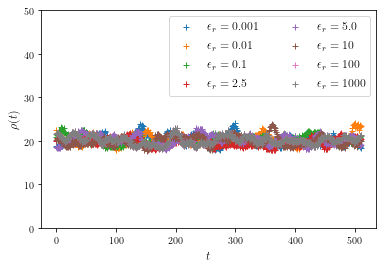

In [9]:
fig1, ax1 = plt.subplots(facecolor="white")
ax1.plot(R[:], data5[:], marker='+', linestyle='None', label=r"$\epsilon_r = 0.001$")
ax1.plot(R[:], data6[:], marker='+', linestyle='None', label=r"$\epsilon_r = 0.01$")
ax1.plot(R[:], data7[:], marker='+', linestyle='None', label=r"$\epsilon_r = 0.1$")
ax1.plot(R[:], data8[:], marker='+', linestyle='None', label=r"$\epsilon_r = 2.5$")
ax1.plot(R[:], data9[:], marker='+', linestyle='None', label=r"$\epsilon_r = 5.0$")
ax1.plot(R[:], data10[:], marker='+', linestyle='None', label=r"$\epsilon_r = 10$")
ax1.plot(R[:], data11[:], marker='+', linestyle='None', label=r"$\epsilon_r = 100$")
ax1.plot(R[:], data12[:], marker='+', linestyle='None', label=r"$\epsilon_r = 1000$")
#ax1.plot(data1, linestyle="-", label=r"$\epsilon_m = 0.1$")
#ax1.plot(data2, linestyle="-", label=r"$\epsilon_m = 2.5$")
#ax1.plot(data3, linestyle="-", label=r"$\epsilon_m = 5.0$")
#ax1.plot(data4, linestyle="-", label=r"$\epsilon_m = 10.0$")
#ax1.semilogy(r[1:128], data1[70,1:128], label=r"$\epsilon_r = 0.1$")
#ax1.semilogy(r[1:128], data2[70,1:128], label=r"$\epsilon_r = 2.5$")
#ax1.semilogy(r[1:128], data3[70,1:128], label=r"$\epsilon_r = 5.0$")
#ax1.semilogy(r[1:128], data4[70,1:128], label=r"$\epsilon_r = 10.0$")
#ax1.axhline(30, linestyle='--', color='k')
#ax1.axvline(64, linestyle='-', color='k')
#ax1.axvline(138, linestyle='--', color='k')
#ax1.axvline(438, linestyle='--', color='k')
#ax1.axvline(511, linestyle='-', color='k')
#ax1.axhline(0.75, linestyle='--', color='k', label='Mean Field Carrying Capacity')
ax1.set_xlabel(r'$t$', fontsize='large')
ax1.set_ylabel(r'$\rho(t)$', fontsize='large')
ax1.set_ylim(bottom=0, top=50)
ax1.legend(fontsize='large', ncol=2)